<a href="https://colab.research.google.com/github/Crane-lupert/birdobjectdetection_2022/blob/main/bird_species_detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
    # TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.8.2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def get_counts(dataset_path,dataset_type):
  """Takes dataset's folder path and returns some basic details like species count, images count, height, width etc."""
  all_species_count = len(os.listdir(dataset_path))
  all_species_names=[]
  species_image_count=[]
  all_heights=[]
  all_widths=[]
  for i in tqdm(os.listdir(dataset_path)):
    all_species_names.append(i)
    species_folder_path = dataset_path + "/" + i + "/"
    species_image_count.append(len(os.listdir(species_folder_path)))
    for j in os.listdir(species_folder_path):
      filename = species_folder_path + j
      image = imread(filename)
      all_heights.append(image.shape[0])
      all_widths.append(image.shape[1])
  print()
  print(f"Total no. of species in {dataset_type}= {all_species_count}")
  return all_species_names,species_image_count,all_heights,all_widths

In [ ]:
import os
from tqdm import tqdm
from cv2 import imread
#/content/drive/MyDrive/archive/train
train_species_names,train_species_image_count,train_images_heights,train_images_widths = get_counts(dataset_path="/content/drive/MyDrive/archive_100/train_data/train_data",dataset_type="train")
# val_species_names,val_species_image_count,val_images_heights,val_images_widths = get_counts(dataset_path="/content/drive/MyDrive/archive_100/valid",dataset_type="validation")
test_species_names,test_species_image_count,test_images_heights,test_images_widths = get_counts(dataset_path="/content/drive/MyDrive/archive_100/test_data/test_data",dataset_type="test")
# #data load
# # one only
# os.rename(src="/content/drive/MyDrive/archive/train/BLACK & YELLOW  BROADBILL",dst="/content/drive/MyDrive/archive/train/BLACK & YELLOW BROADBILL")
# check = sorted(os.listdir("/content/drive/MyDrive/archive/train/")) == sorted(os.listdir("/content/drive/MyDrive/archive/valid/")) == sorted(os.listdir("/content/drive/MyDrive/archive/test/"))
# print("Are all species names same in train, validation & test datasets now? -->",check)


100%|██████████| 16/16 [05:18<00:00, 19.89s/it]



Total no. of species in train= 16


 44%|████▍     | 7/16 [03:01<03:53, 26.00s/it]


KeyboardInterrupt: ignored

In [ ]:
# #224*224*3
# #data while load into case
# parent_dir = "/content/drive/MyDrive/archive/train/"
# all_subdirs = os.listdir(parent_dir)
# chosen_species_dir = all_subdirs[random.randint(0,401)]
# chosen_dir = parent_dir + chosen_species_dir
# all_images_in_chosen_dir = os.listdir(chosen_dir)
# chosen_img = chosen_dir + "/" +all_images_in_chosen_dir[random.randint(0,len(all_images_in_chosen_dir)-1)]
# image = imread(chosen_img)
# # image = imread("/content/drive/MyDrive/archive/train/ABBOTTS BABBLER/001.jpg")
# plt.title(chosen_species_dir)
# plt.imshow(image)
# image.shape

In [ ]:
#224*224*3
#data load test
import numpy as np
from cv2 import resize
def getin(dir):
    train_images=[]
    train_labels=[]
    parent_dir = dir
    all_subdirs = os.listdir(parent_dir)
    for i in range(len(all_subdirs)):
        chosen_species_dir = all_subdirs[i]
        chosen_dir = parent_dir + chosen_species_dir    
        all_images_in_chosen_dir = os.listdir(chosen_dir)
        for j in range(len(all_images_in_chosen_dir)):
            chosen_img = chosen_dir + "/" +all_images_in_chosen_dir[j]
            image = resize(imread(chosen_img), (128,128))#해상도 축소+통일
            train_images.append(image)
            train_labels.append(chosen_species_dir)
    return train_images, train_labels

In [ ]:
train_images, train_labels = getin("/content/drive/MyDrive/archive_100/train_data/train_data/")
test_images, test_labels = getin("/content/drive/MyDrive/archive_100/test_data/test_data/")

In [ ]:
train_images, train_labels=np.array(train_images), np.array(train_labels)
test_images, test_labels=np.array(test_images), np.array(test_labels)

In [ ]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
from tensorflow.keras.utils import to_categorical

typ = set(train_labels)
def category_change(label):
    ind = 0
    for t in typ:
        label[label==t]=ind
        ind+=1
    return to_categorical(label)

In [ ]:
train_labels = category_change(train_labels)
test_labels = category_change(test_labels)

In [ ]:
len(typ)

16

In [ ]:
from keras import models
from keras import layers

model1 = models.Sequential()
model1.add(layers.Conv2D(8, (3,3), padding='same', input_shape=(128, 128, 3), activation='relu'))
model1.add(layers.pooling.MaxPooling2D(pool_size=(2,2)))
model1.add(layers.Dropout(0.2))

model1.add(layers.Conv2D(16, (3,3), padding='same', activation='relu'))
model1.add(layers.pooling.MaxPooling2D(pool_size=(2,2)))
model1.add(layers.Dropout(0.3))

model1.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
model1.add(layers.pooling.MaxPooling2D(pool_size=(2,2)))
model1.add(layers.Dropout(0.3))

model1.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model1.add(layers.pooling.MaxPooling2D(pool_size=(2,2)))
model1.add(layers.Dropout(0.3))

model1.add(layers.Flatten())
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dense(32, activation='relu'))
model1.add(layers.Dense(16, activation='softmax'))

model1.compile(loss='categorical_crossentropy', 
               optimizer='adam', 
               metrics=['accuracy'])

In [ ]:
history = model1.fit(train_images,
           train_labels,
           epochs=30,
           batch_size=32,
           validation_split=0.1)

Epoch 1/30
5/5 [==============================] - 1s 64ms/step - loss: 2.8281 - accuracy: 0.1037 - val_loss: 2.8261 - val_accuracy: 0.0000e+00
Epoch 2/30
5/5 [==============================] - 0s 24ms/step - loss: 2.7069 - accuracy: 0.1259 - val_loss: 2.8351 - val_accuracy: 0.0000e+00
Epoch 3/30
5/5 [==============================] - 0s 23ms/step - loss: 2.6498 - accuracy: 0.1556 - val_loss: 2.8841 - val_accuracy: 0.0000e+00
Epoch 4/30
5/5 [==============================] - 0s 22ms/step - loss: 2.6201 - accuracy: 0.1481 - val_loss: 2.9047 - val_accuracy: 0.0000e+00
Epoch 5/30
5/5 [==============================] - 0s 22ms/step - loss: 2.5703 - accuracy: 0.1556 - val_loss: 2.8899 - val_accuracy: 0.0000e+00
Epoch 6/30
5/5 [==============================] - 0s 21ms/step - loss: 2.5035 - accuracy: 0.2074 - val_loss: 2.9018 - val_accuracy: 0.0000e+00
Epoch 7/30
5/5 [==============================] - 0s 21ms/step - loss: 2.4509 - accuracy: 0.1926 - val_loss: 2.9215 - val_accuracy: 0.0000e+00

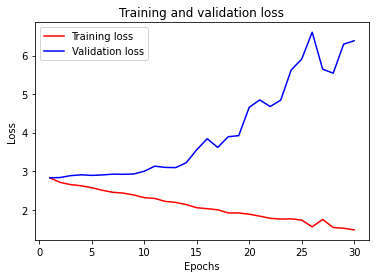

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

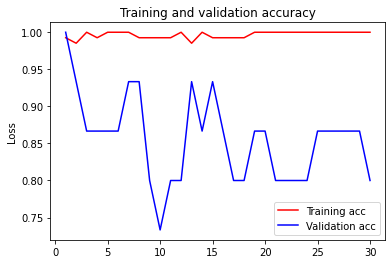

In [ ]:
plt.clf()   # clear figure
history_dict = history.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'r', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
#위 그래프를 보건데 epoch은 240이 적절하다 판단됨
history = model1.fit(train_images,
           train_labels,
           epochs=30,
           batch_size=32,
           verbose=0)

In [ ]:
print(model1.evaluate(test_images, test_labels)[1])#test accuracy

5/5 [==============================] - 0s 40ms/step - loss: 7.0624 - accuracy: 0.3121
0.31210190057754517
